## EXPLORATION_01

### Tensorflow_keras를 이용해서 가위바위보 판독기 만들기


#### standard
1. 이미지 분류기 모델이 성공적으로 만들어지고 트레이닝이 정상적으로 수행되었는가? 모델 잘 만들고 트레이닝 시켰는지
2. 오버피팅을 극복하기 위한  데이터셋의 다양성, 정규화 등의 시도가 적절하였는가? 데이터셋를 잘 만들었는지
3. 분류모델의 test accuracy가 60% 이상 도달하였는가? accuracy

    
#### sequence
1. 데이터 준비: 필요한 Library import -> 데이터 Resizing(shape) -> 데이터 labeling 및 행렬 생성 -> 데이터 정규화
2. 인공지능 모델 구현:tensorflow와 keras로 구축 
3. 인공지능 모델 학습
4. 모델 평가: Validation set으로 모델 성능 검증 -> Test set으로 모델 성능 평가

    
#### trial and error
- Hyper parameter값 변경:
- 학습데이터 변경: 처음엔_내가 찍은 사진 각100장 총 300장으로 학습 진행/두번째_세사람이 각각 찍은 사진 100장 총300장으로 학습시킴/세번째_네사람이 찍은 사진 200장 총 600장으로 학습시킴 && 학습이미지 해상도 변경


In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image
import glob

#### 데이터 Resizing

In [9]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [10]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [12]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


#### 데이터 labeling 및 행렬 생성

In [14]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

#### 데이터 정규화

In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


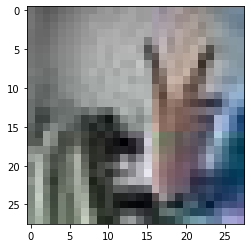

In [16]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#### 모델을 만들어봅시다

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential() #먼저 Sequential API를 사용해 네트워크를 model변수에 초기화 한다.
model.add(keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# Conv2D 레이어에 이미지 특징 수, 입력 이미지의 형태 등을 넣고 MaxPooling2D를 통해 맥스 풀링 연산을 한다.
# Dense 레이어는 분류기에 사용되는 뉴런의 숫자를 입력하고 마지막 Dense 레이어에는 결과에 도출할 클래스 수를 입력한다.
# 우리는 가위, 바위, 보 세가지 클래스 이므로, 정수 3을 입력한다.

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_5 (Dense)              (

#### 학습을 시켜봅시다 

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 28s 9ms/step - loss: 8.6661 - accuracy: 0.5567
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.9229 - accuracy: 0.7000
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.7450
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7850
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8250
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8317
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8733
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.8917
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.8950
Epoch 10/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.9017


#### test

In [31]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 0 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1147 - accuracy: 0.0000e+00
test_loss: 1.1147326231002808 
test_accuracy: 0.0



###  standard
1. 이미지 분류기 모델이 성공적으로 만들어지고 트레이닝이 정상적으로 수행되었는가? 모델 잘 만들고 트레이닝 시켰는지 yes
2. 오버피팅을 극복하기 위한  데이터셋의 다양성, 정규화 등의 시도가 적절하였는가? 데이터셋를 잘 만들었는지 yes
3. 분류모델의 test accuracy가 60% 이상 도달하였는가? yes


아쉬운점
제출 직전에 보니 파일이 날라가있었다... 그래서 급하게 다시 만드느라 해상도 변경에 따른 에러를 잡지 못해서 다시 낮췄고 모델학습은 완료했으나 테스트셋에 제대로 테스트를 못했다... 그래도 2시간도 안된 시간 안에 완성했다는 것에 의의를 두는걸로 ㅠㅠ...